# EDA with python and applying logistic Regression

In [ ]:
# for this we will be working with the titanic Data set from kaggle. This is a very famous data set abd very often is a student's first step in machine learning.

In [ ]:
# we will be trying to predict a classification -survival or deceased. let's begin our understanding of implementing logistic regression in python for classification.

In [ ]:
# we will use a " semi-cleaned" version of the titanic data set. if you use the data set hosted directly on kaggle. you may need to do some additional cleaning not shown in this lecture notebook

# Import Libraries

In [ ]:
# let's import some libraries to get started

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# The Data

### let's start by reading in the titanic csv file into a pandas dataframe

In [8]:
import pandas as pd
train=pd.read_csv('titanic_train.csv')

In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

#### let's begin some exploratory data analysis! we will start by checking out missing data!

## Missing Data

##### we can use seaborn to create a simple heatmap to see where we are missing data

In [10]:
train.isnull()     # isnull() is inbuilt function in dataframe. it is helps us to find out the each and every value  either true or false .it give True it is null

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

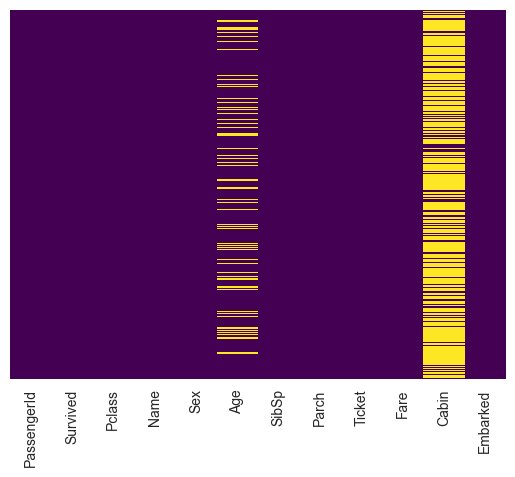

In [11]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

##### Roughly 20 percent of the Age dat is missing. The proportion of Age missing is likely small enough for reasonable replacement with some from of imputation.Looking at the cabin column,it looks like we are just missing too much data to do something useful with  at a basic level we will probably drop this later.or change it to another feature like "Cabin Know 1 or 0"

##### let's continue on by visualizing some more of the data! Check out the video for full explanation over these plots.this code is just to serve as reference.

<Axes: xlabel='Survived', ylabel='count'>

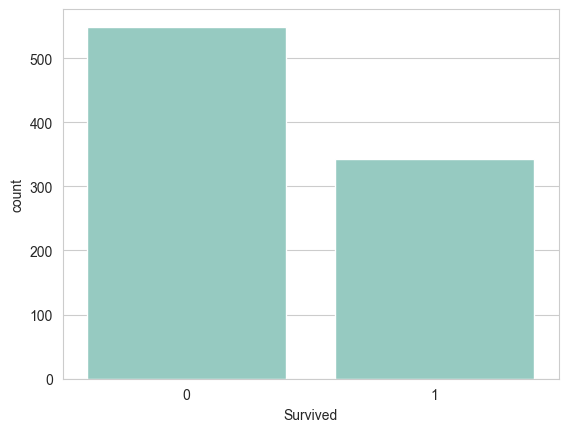

In [24]:


sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)